## Basic Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_path = '../Data/2020/heart_2020_cleaned.csv'

In [3]:
# Load the data
data = pd.read_csv(data_path)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# General information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Visualizing the Data Set

### Single Variable Visualization

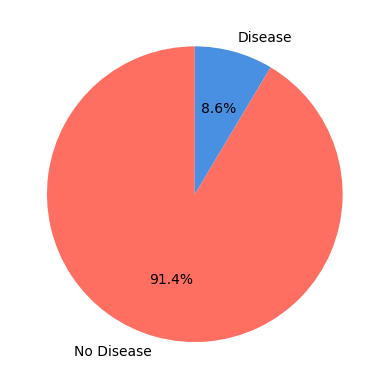

In [6]:
plt.pie(data['HeartDisease'].value_counts(), labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90, colors = ['#FF6F61', '#4A90E2', '#FF6F61', '#4A90E2'])
plt.show()

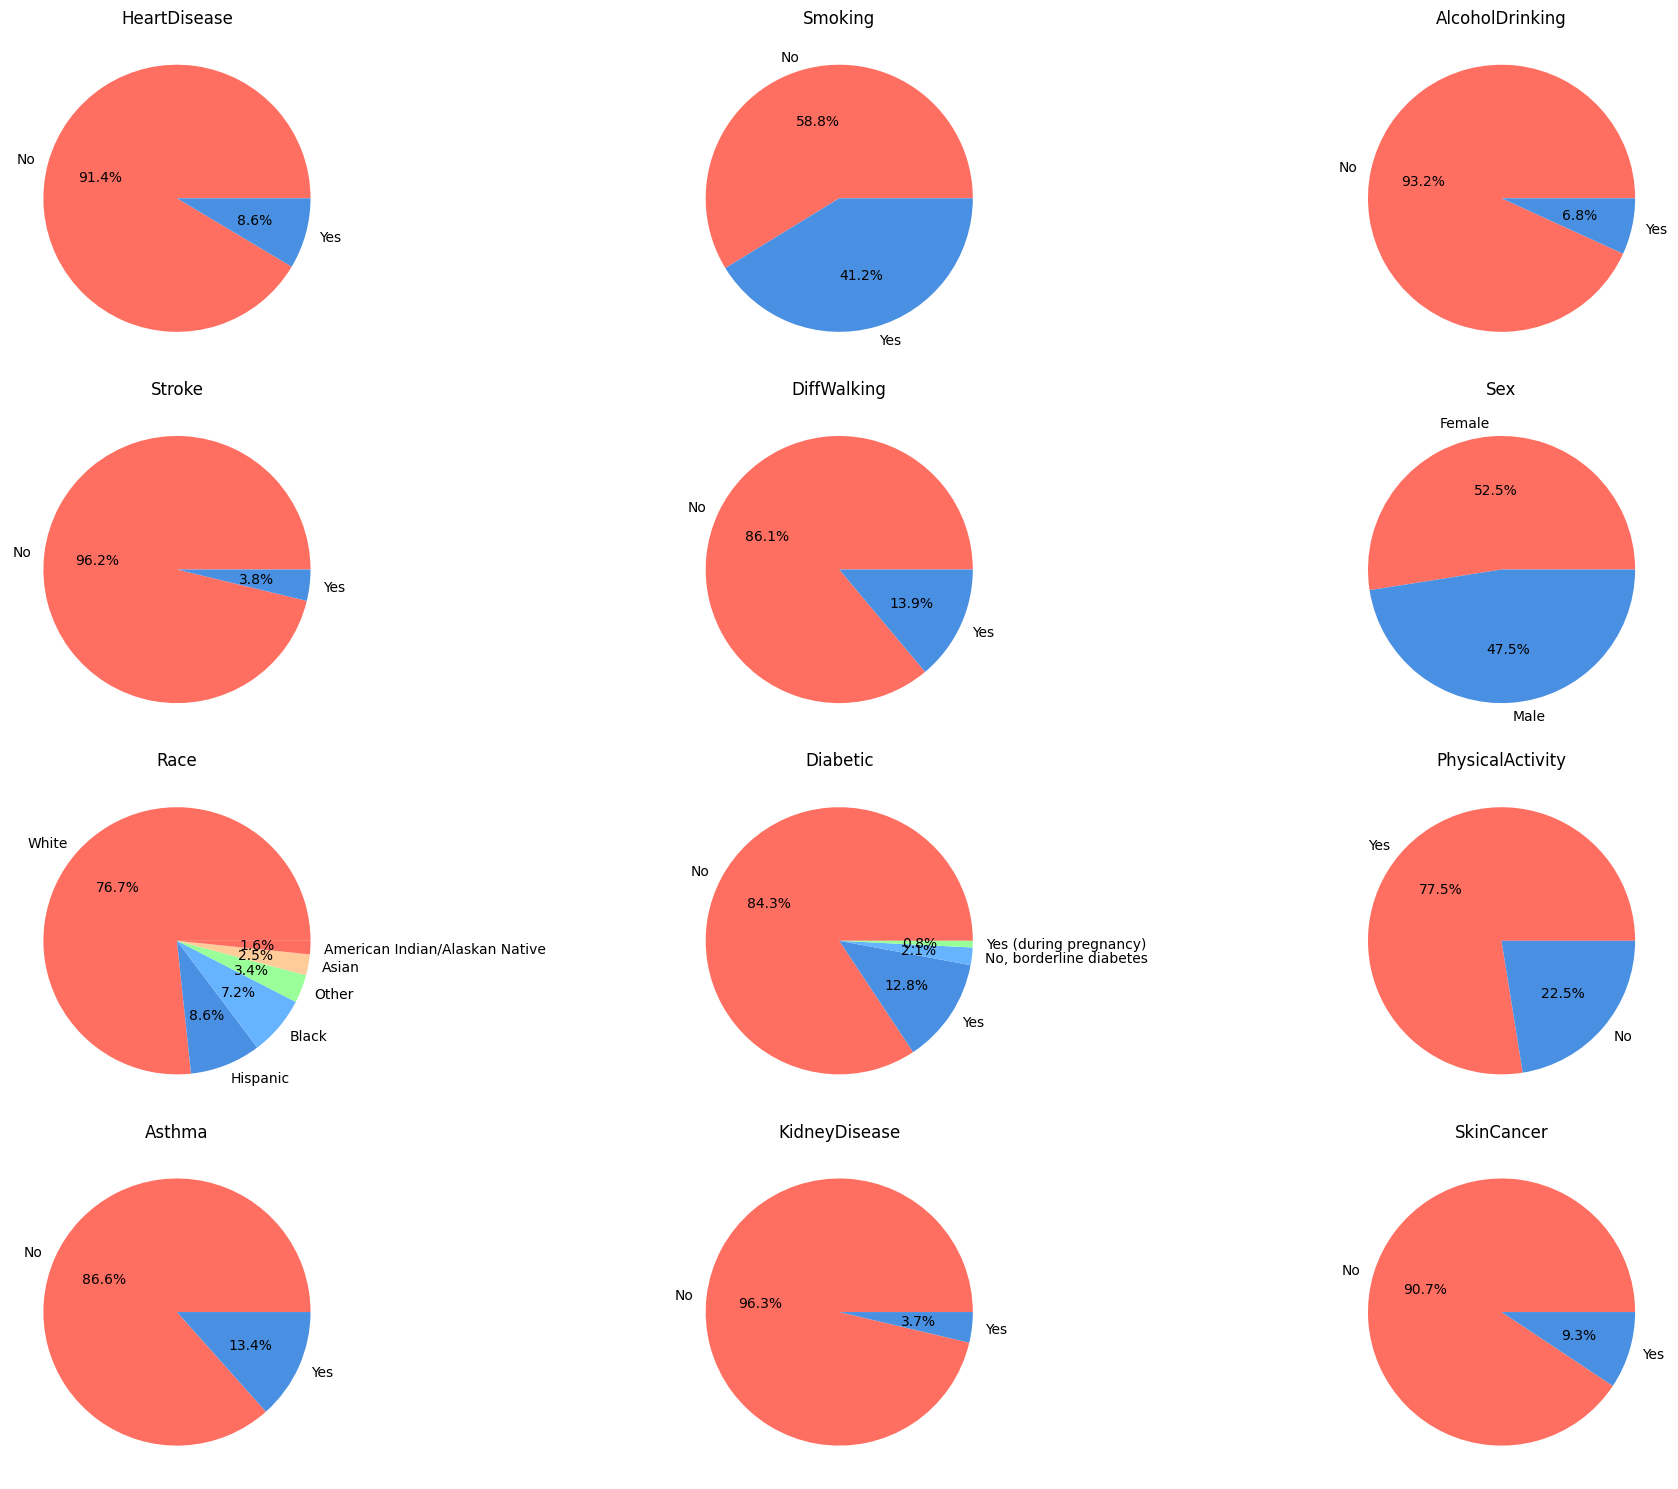

In [7]:
columns_to_plot = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
                   'Race', 'Diabetic', 'PhysicalActivity', 
                   'Asthma', 'KidneyDisease', 'SkinCancer']

# Determine the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_cols = 3  # You can adjust this to fit your layout
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a pie chart
for i, column in enumerate(columns_to_plot):
    value_counts = data[column].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['#FF6F61', '#4A90E2', '#66b3ff', '#99ff99', '#ffcc99'])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

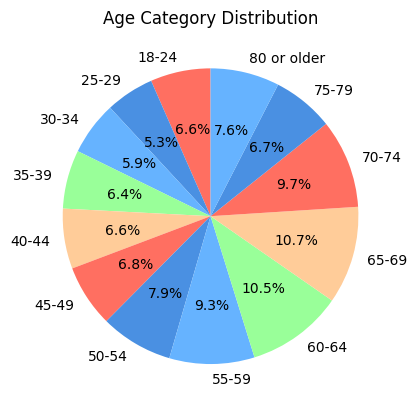

In [8]:
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
             '60-64', '65-69', '70-74', '75-79', '80 or older']

# Get the value counts and ensure they are sorted by the defined age order
age_counts = data['AgeCategory'].value_counts().reindex(age_order)

# Plot the pie chart
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6F61', '#4A90E2', '#66b3ff', '#99ff99', '#ffcc99', '#FF6F61', '#4A90E2', '#66b3ff', '#99ff99', '#ffcc99', '#FF6F61', '#4A90E2', '#66b3ff'])
plt.title('Age Category Distribution')
plt.show()

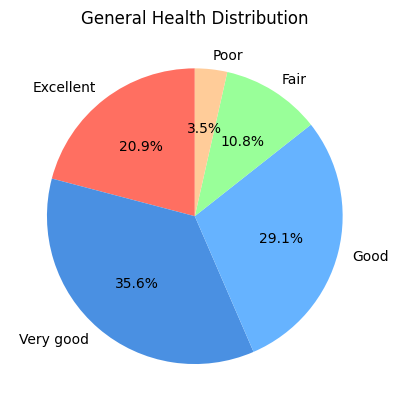

In [9]:
gen_health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
gen_counts = data['GenHealth'].value_counts().reindex(gen_health_order)
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6F61', '#4A90E2', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('General Health Distribution')
plt.show()

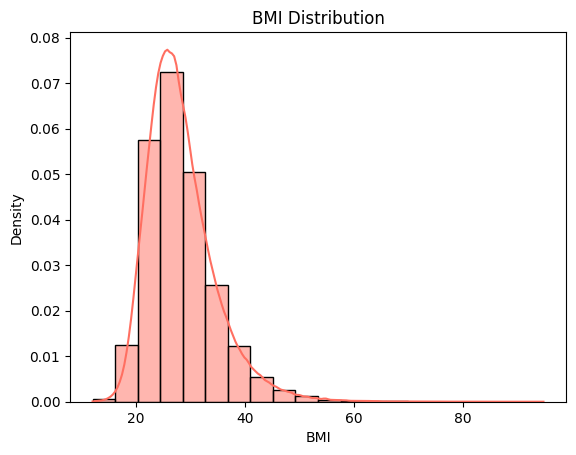

In [10]:
sns.histplot(data['BMI'], bins=20, kde=True, color='#FF6F61', stat='density')
plt.title('BMI Distribution')
plt.show()

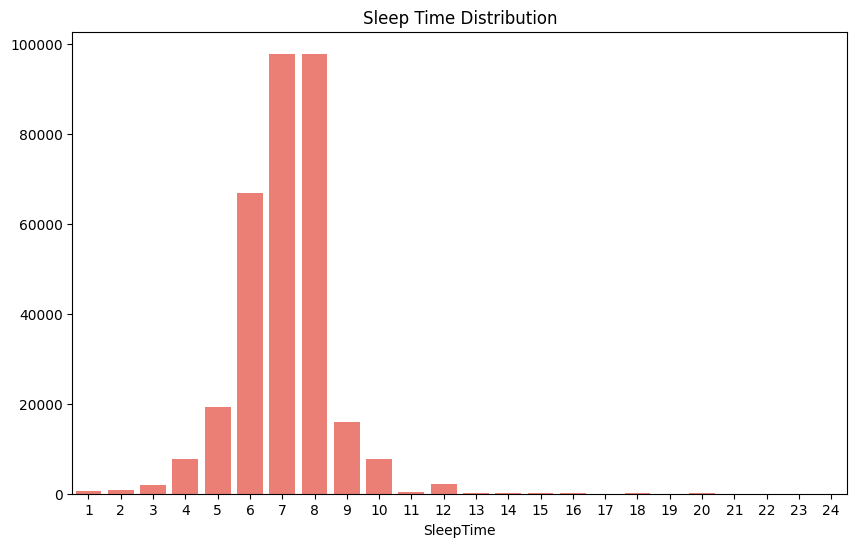

In [12]:
import warnings
warnings.filterwarnings('ignore')
sleep_time_counts = data['SleepTime'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_time_counts.index.astype(int), y=sleep_time_counts.values, color='#FF6F61')
plt.title('Sleep Time Distribution')
plt.show()

### Multi-Variable Visualization

In [31]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [32]:
heat_copy = data.copy()
def encode(data):
    # Define special mappings
    special_mappings = {
        'HeartDisease': {'No': 0, 'Yes': 1},
        'Smoking': {'No': 0, 'Yes': 1},
        'AlcoholDrinking': {'No': 0, 'Yes': 1},
        'Stroke': {'No': 0, 'Yes': 1},
        'DiffWalking': {'No': 0, 'Yes': 1},
        'Sex' : {'Female': 0, 'Male': 1},
        'Diabetic' : {'No': 0, 'Yes': 1},
        'PhysicalActivity' : {'No': 0, 'Yes': 1},
        'Asthma' : {'No': 0, 'Yes': 1},
        'KidneyDisease' : {'No': 0, 'Yes': 1},
        'SkinCancer' : {'No': 0, 'Yes': 1}
    }
    
    # General mappings for other categorical columns
    for column in data.select_dtypes('object').columns:
        if column in special_mappings:
            data[column] = data[column].map(special_mappings[column])
        else:
            data[column] = data[column].astype('category').cat.codes
    
    return data
encoded_data = encode(heat_copy)

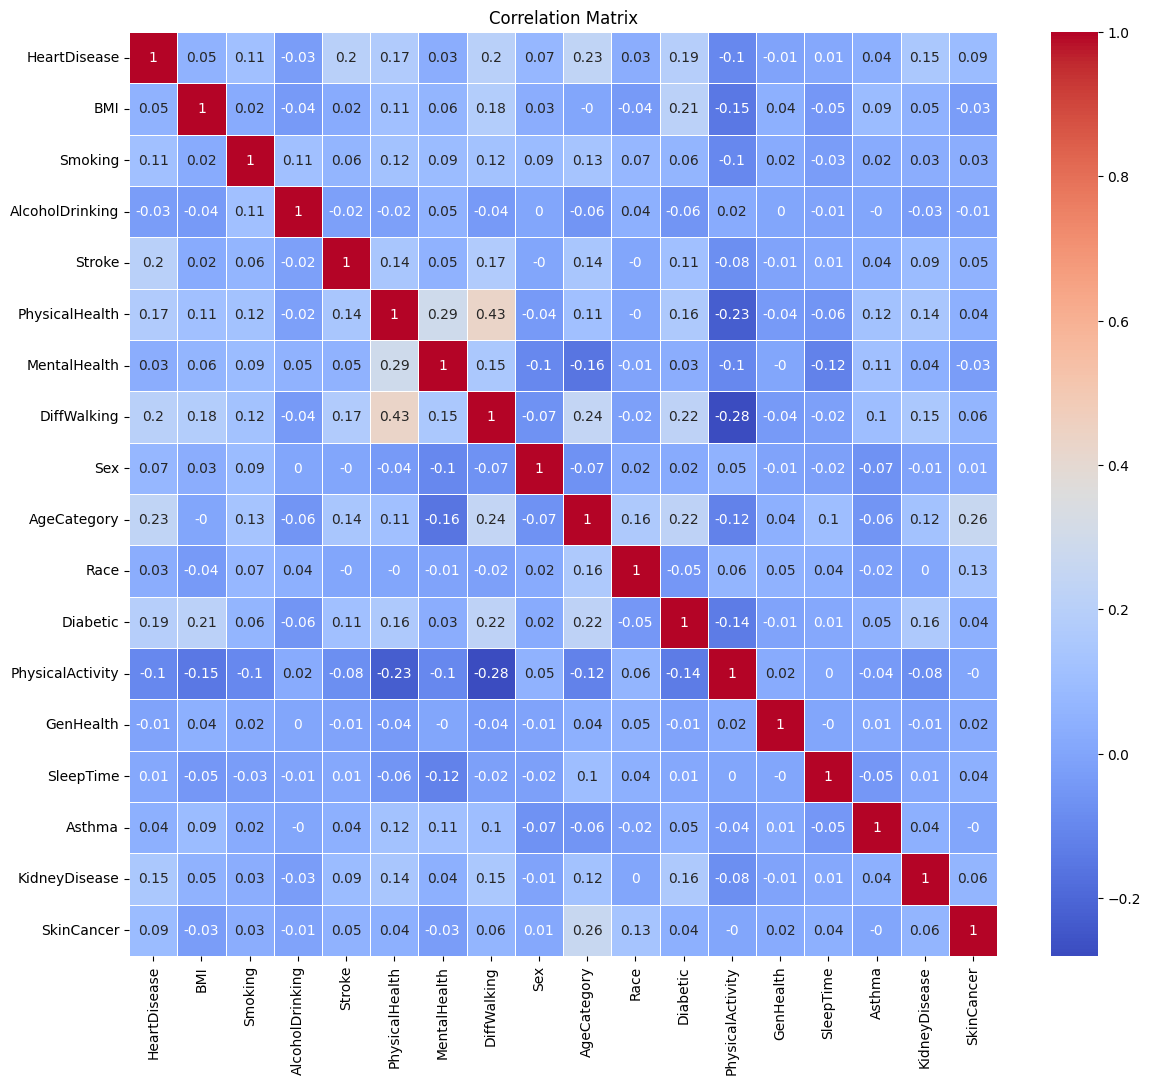

In [33]:
corr = encoded_data.corr().round(2)
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

***Age Exploration***

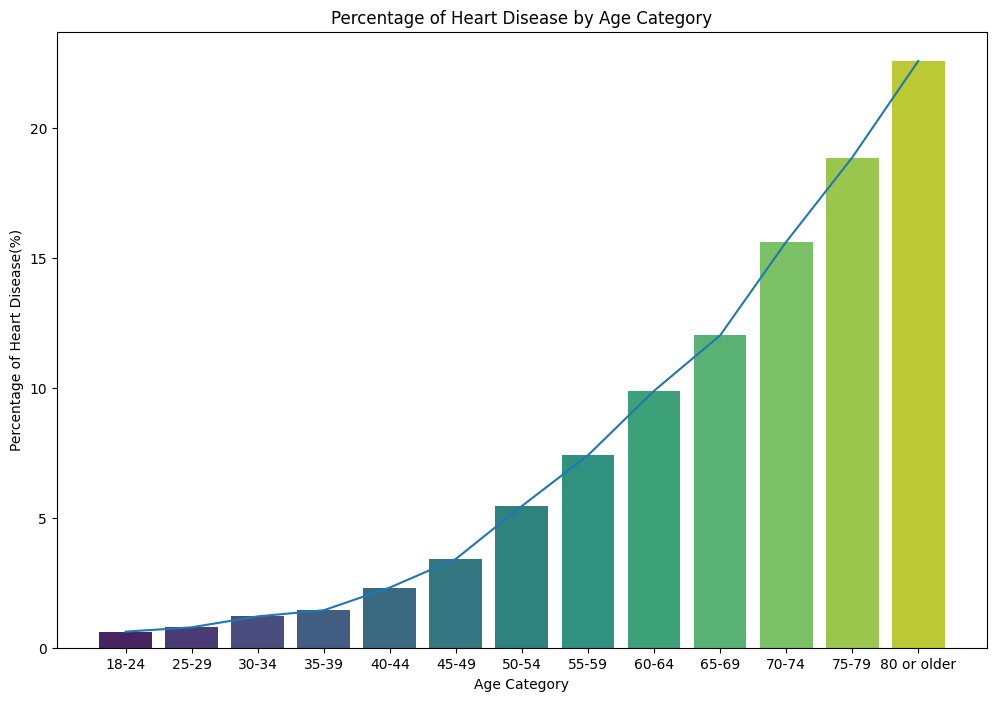

In [28]:
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
             '60-64', '65-69', '70-74', '75-79', '80 or older']
data_numerical = data.copy()
data_numerical['HeartDisease'] = data_numerical['HeartDisease'].astype('category').cat.codes
heart_disease_percentage = data_numerical.groupby('AgeCategory')['HeartDisease'].mean().reindex(age_order) * 100
plt.figure(figsize=(12, 8))
sns.barplot(x=heart_disease_percentage.index, y=heart_disease_percentage.values, palette='viridis')
sns.lineplot(x=heart_disease_percentage.index, y=heart_disease_percentage.values, palette='viridis')
plt.title('Percentage of Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Disease(%)')

plt.show()

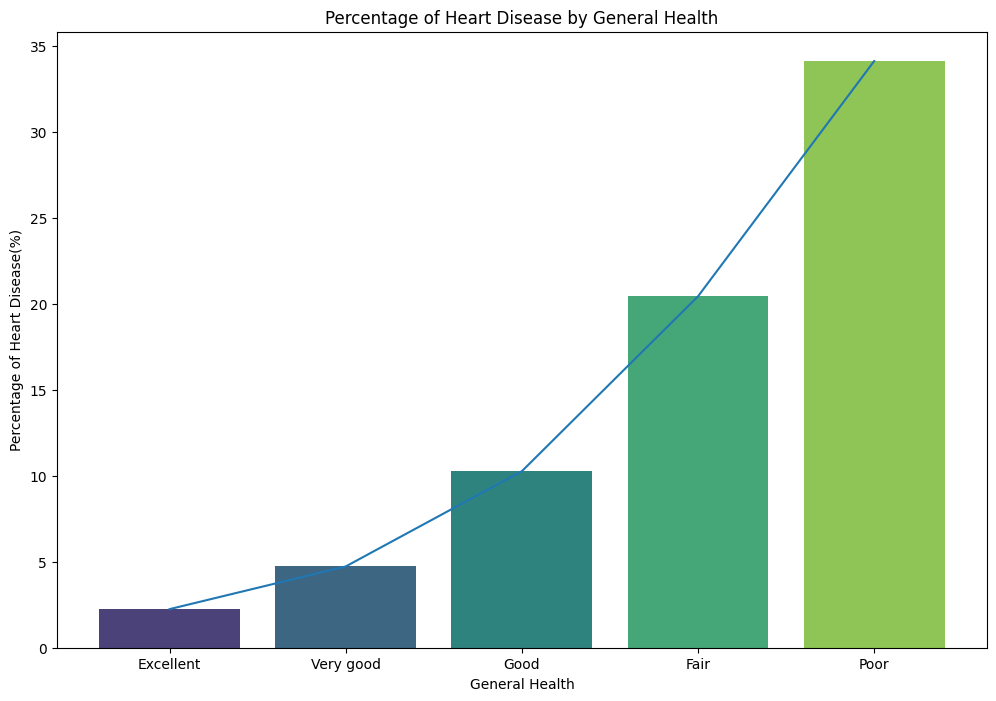

In [36]:
gen_health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
gen_health_percentage = data_numerical.groupby('GenHealth')['HeartDisease'].mean().reindex(gen_health_order) * 100
plt.figure(figsize=(12, 8))
sns.barplot(x=gen_health_percentage.index, y=gen_health_percentage.values, palette='viridis')
sns.lineplot(x=gen_health_percentage.index, y=gen_health_percentage.values, palette='viridis')
plt.title('Percentage of Heart Disease by General Health')
plt.xlabel('General Health')
plt.ylabel('Percentage of Heart Disease(%)')
plt.show()

In [46]:
data_sd = data.copy()
data_sd = data_sd[['HeartDisease', 'Smoking', 'AlcoholDrinking']]
data_sd['Smoking'] = data_sd['Smoking'].map({'No': 0, 'Yes': 1})
data_sd['AlcoholDrinking'] = data_sd['AlcoholDrinking'].map({'No': 0, 'Yes': 1})
data_sd['HeartDisease'] = data_sd['HeartDisease'].map({'No': 0, 'Yes': 1})
data_sd['Smoking and Alcohol Drinking'] = data_sd['Smoking'] + data_sd['AlcoholDrinking']
data_sd.describe()

,HeartDisease,Smoking,AlcoholDrinking,Smoking and Alcohol Drinking
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.068097,0.480573
std,0.279766,0.492281,0.251912,0.577513
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000


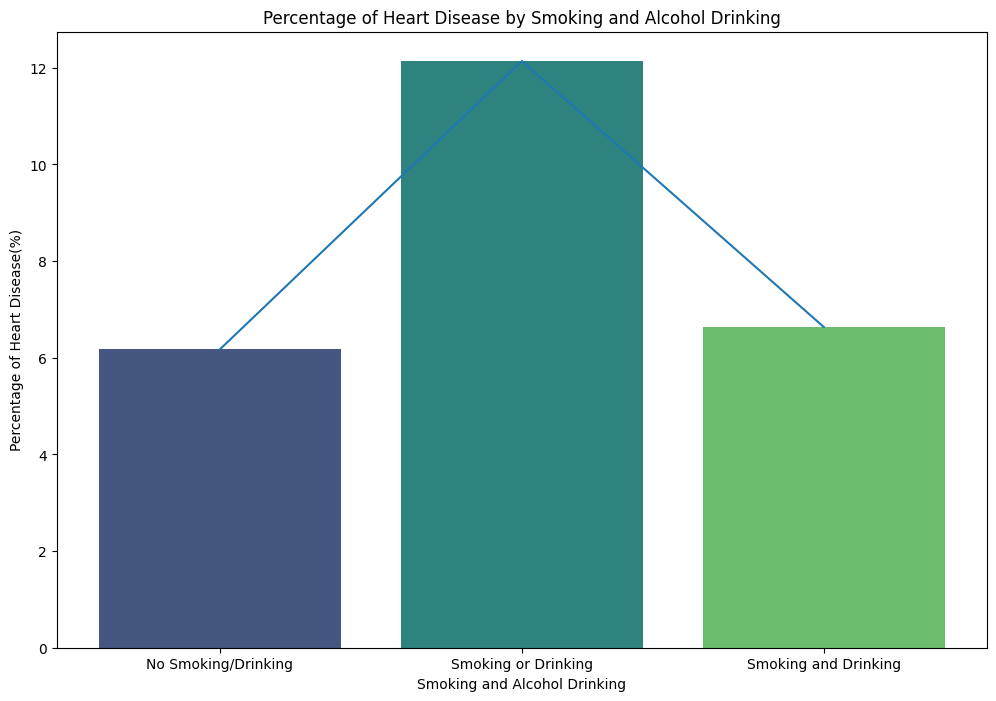

In [53]:
smoking_alcohol = data_sd.groupby('Smoking and Alcohol Drinking')['HeartDisease'].mean() * 100
plt.figure(figsize=(12, 8))
plt.xticks([0, 1, 2], ['No Smoking/Drinking', 'Smoking or Drinking', 'Smoking and Drinking'])
sns.barplot(x=smoking_alcohol.index, y=smoking_alcohol.values, palette='viridis')
sns.lineplot(x=smoking_alcohol.index, y=smoking_alcohol.values, palette='viridis')
plt.title('Percentage of Heart Disease by Smoking and Alcohol Drinking')
plt.xlabel('Smoking and Alcohol Drinking')
plt.ylabel('Percentage of Heart Disease(%)')
plt.show()

***Question1:***
Why the people who both smokes and drinks are lower than the people who only smokes or only drinks?

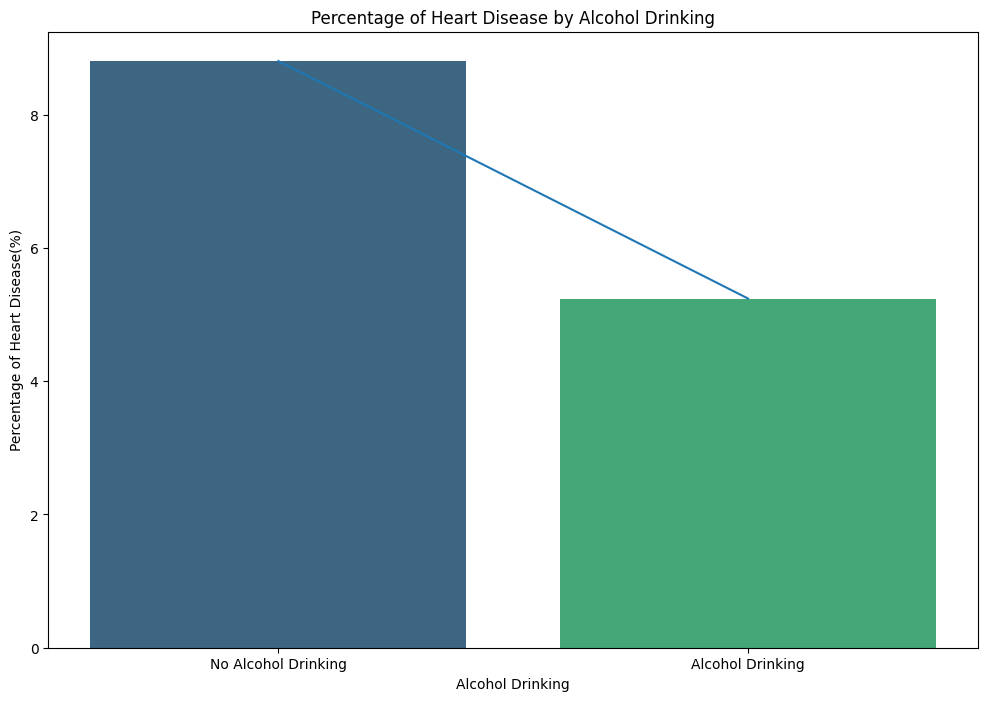

In [55]:
alcohol = data_sd.groupby('AlcoholDrinking')['HeartDisease'].mean() * 100
plt.figure(figsize=(12, 8))
plt.xticks([0, 1], ['No Alcohol Drinking', 'Alcohol Drinking'])
sns.barplot(x=alcohol.index, y=alcohol.values, palette='viridis')
sns.lineplot(x=alcohol.index, y=alcohol.values, palette='viridis')
plt.title('Percentage of Heart Disease by Alcohol Drinking')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Percentage of Heart Disease(%)')
plt.show()

***Question2:***
Does it healthy to drink, especially in the aspect of protecting people from heart disease?

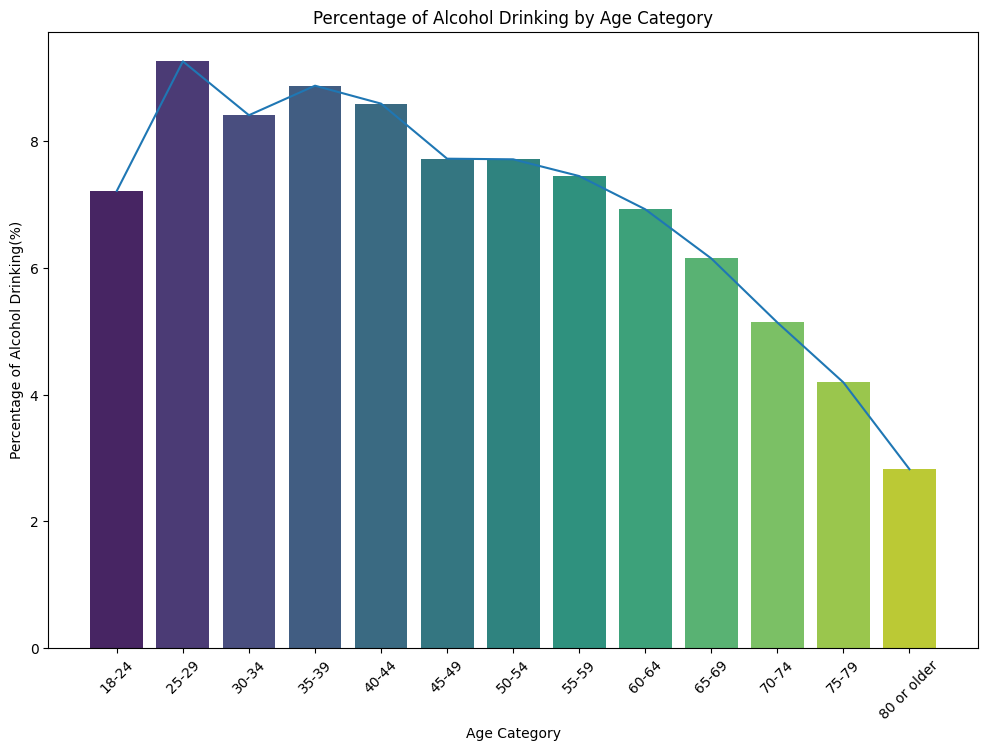

In [57]:
data_alcohol_age = data.copy()
data_alcohol_age = data_alcohol_age[['HeartDisease', 'AlcoholDrinking', 'AgeCategory']]
data_alcohol_age['AlcoholDrinking'] = data_alcohol_age['AlcoholDrinking'].map({'No': 0, 'Yes': 1})
data_alcohol_age['HeartDisease'] = data_alcohol_age['HeartDisease'].map({'No': 0, 'Yes': 1})
data_alcohol_age['AgeCategory'] = data_alcohol_age['AgeCategory'].astype('category').cat.codes

alcohol_age = data_alcohol_age.groupby('AgeCategory')['AlcoholDrinking'].mean() * 100
plt.figure(figsize=(12, 8))
plt.xticks(range(13), age_order, rotation=45)
sns.barplot(x=alcohol_age.index, y=alcohol_age.values, palette='viridis')
sns.lineplot(x=alcohol_age.index, y=alcohol_age.values, palette='viridis')
plt.title('Percentage of Alcohol Drinking by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Alcohol Drinking(%)')
plt.show()

***This might be a possible answer:***

Since the younger people are more likely to drink, but they are not likely to have heart disease. However, the elder people are more likely to have heart disease, but they are not likely to drink. This may lead a bias that drinking is healthy.